In [1]:
!pip install pandas numpy matplotlib scikit-learn seaborn

In [51]:
%load_ext autoreload
%autoreload 2
from pathlib import Path 
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from glob import glob
import itertools
from functools import lru_cache, cache
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import seaborn as sns; sns.set()
from sklearn.mixture import GaussianMixture

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from Dataset import dataset

In [7]:
#X_ = dataset.sonde_week("Marseille_01")
X = dataset.X_week()

pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 1, 4, 0), x: 2, weekday : 2, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 2, 4, 0), x: 14, weekday : 3, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 3, 4, 0), x: 26, weekday : 4, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 4, 4, 0), x: 38, weekday : 5, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 5, 4, 0), x: 50, weekday : 6, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 6, 4, 0), x: 62, weekday : 0, hour : 4, len : 0
pb pour sonde Marseille_01, avec datetiems datetime.datetime(2020, 1, 7, 4, 0), x: 74, weekday : 1, hour : 4, len : 0
pb pour sonde Marseille_02, avec datetiems datetime.datetime(2020, 1, 1, 4, 0), x: 2, weekday : 2, hour : 4, len : 0
pb pour sonde Marseille_02, avec datetiems datetime.dateti

In [15]:
for x, y in np.argwhere(np.isnan(X)):
    removed_nan = X[:, y][~np.isnan(X[:, y])]
    X[x, y] = np.median(removed_nan) # on remplace les missing value par la médiane

In [ ]:
dataset.measure_df[(self.measure_df["numero"]==sonde) & (self.measure_df["weekday"]==2)]["hour"].unique()

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Anaylse PCA

In [19]:
pca = PCA(n_components=2)
data_proj = pca.fit_transform(X_scaled)

/tmp/ipykernel_210/3758110149.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmax' will be ignored
  ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9)


Text(0.5, 1.0, 'Position of the cities in France')

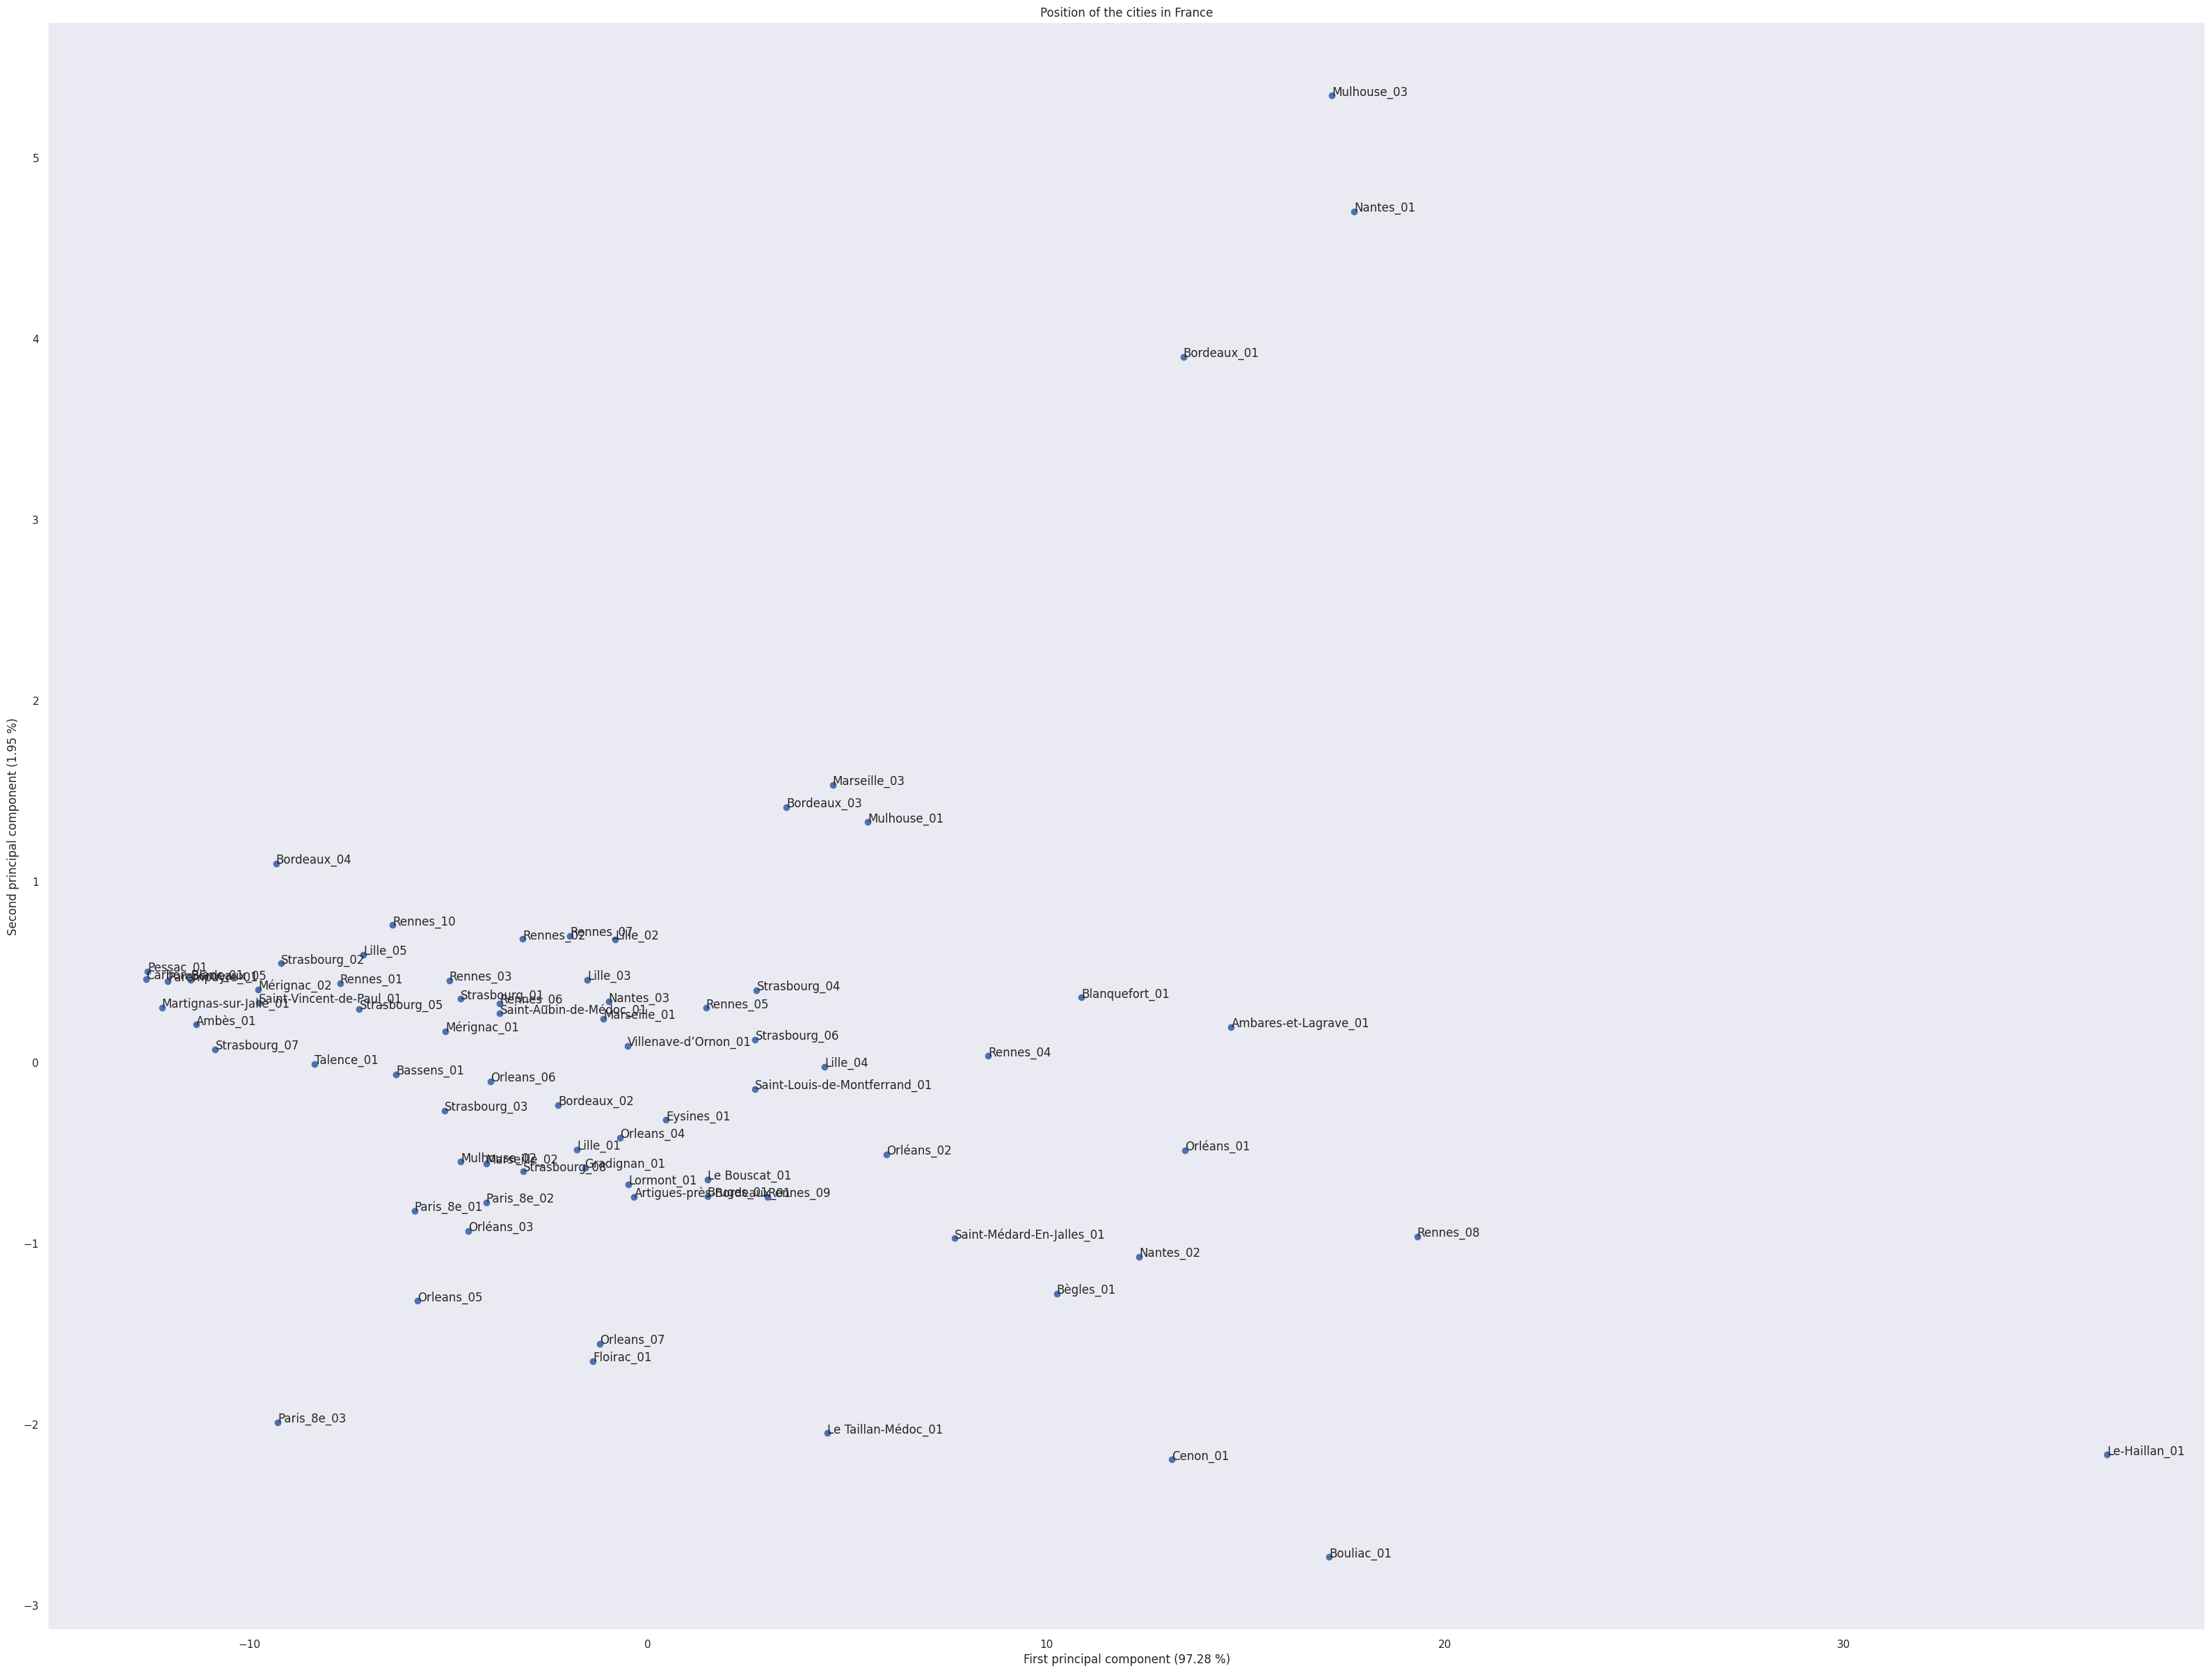

In [37]:
fig, ax = plt.subplots(figsize=(40,30))
ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9)
for i, name in enumerate(dataset.sondes_names):
    ax.annotate(name, (data_proj[i, 0], data_proj[i, 1]))
plt.grid()
plt.xlabel(f"First principal component ({round(pca.explained_variance_ratio_[0] * 100, 2)} %)")
plt.ylabel(f"Second principal component ({round(pca.explained_variance_ratio_[1]* 100, 2)} %)")
plt.title('Position of the cities in France')

<BarContainer object of 84 artists>

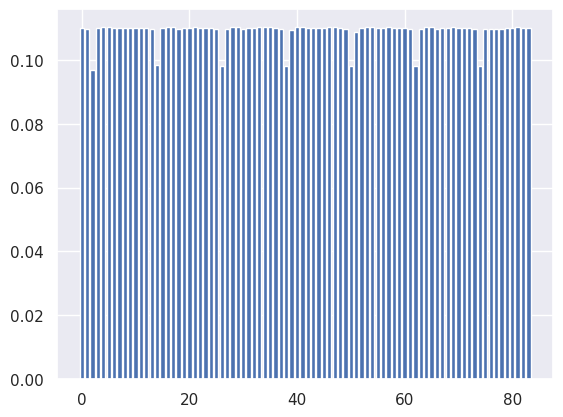

In [49]:
plt.bar(range(84), pca.components_[0])

<BarContainer object of 84 artists>

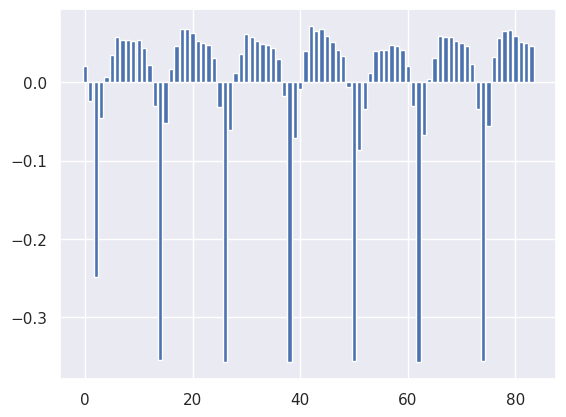

In [36]:
plt.bar(range(84), pca.components_[1])

# Clustering

In [66]:
from sklearn.cluster import KMeans

n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
colors = ("#d8495f","#cc3284","#904493","#8633d0","#5d73d7","#32909e","#328c7b","#41945e","#ae7b38","#d25935")

/tmp/ipykernel_210/1414859851.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmax' will be ignored
  ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9, c=[colors[f] for f in labels])


Text(0.5, 1.0, 'Position of the cities in France')

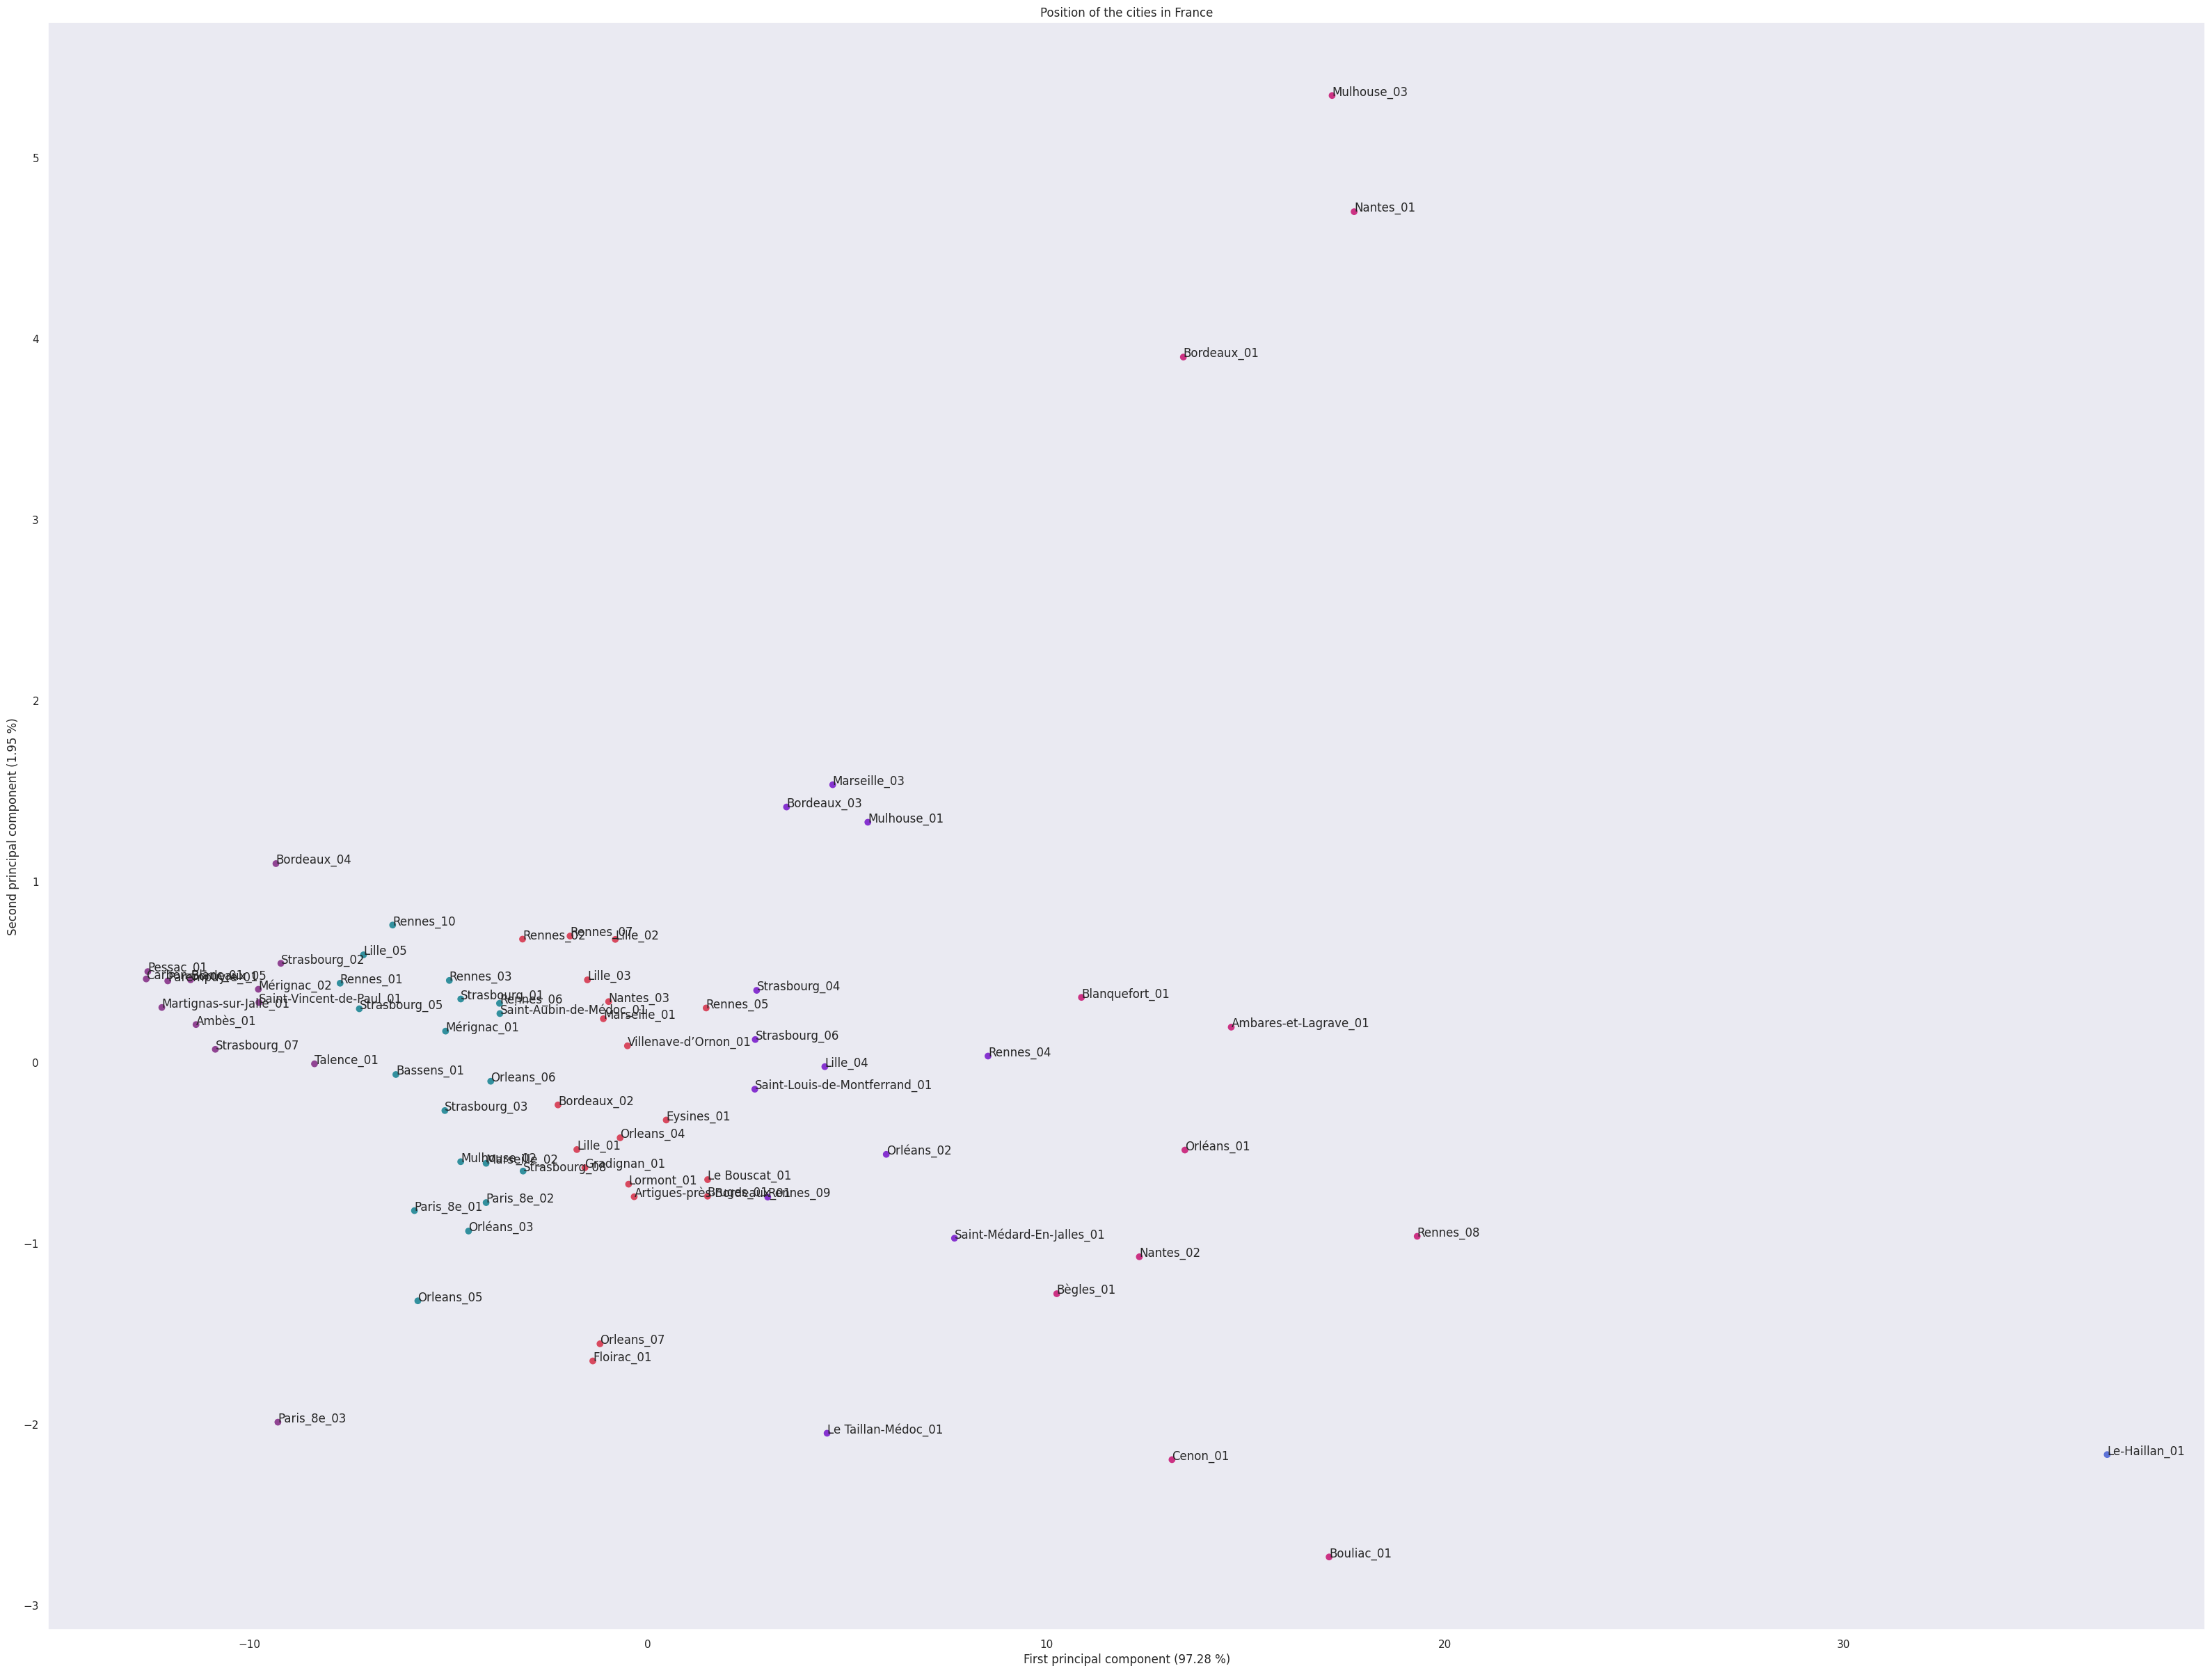

In [67]:
fig, ax = plt.subplots(figsize=(40,30))
ax.scatter(data_proj[:, 0], data_proj[:, 1], cmap='tab10', vmax=9, c=[colors[f] for f in labels])
for i, name in enumerate(dataset.sondes_names):
    ax.annotate(name, (data_proj[i, 0], data_proj[i, 1]))
plt.grid()
plt.xlabel(f"First principal component ({round(pca.explained_variance_ratio_[0] * 100, 2)} %)")
plt.ylabel(f"Second principal component ({round(pca.explained_variance_ratio_[1]* 100, 2)} %)")
plt.title('Position of the cities in France')

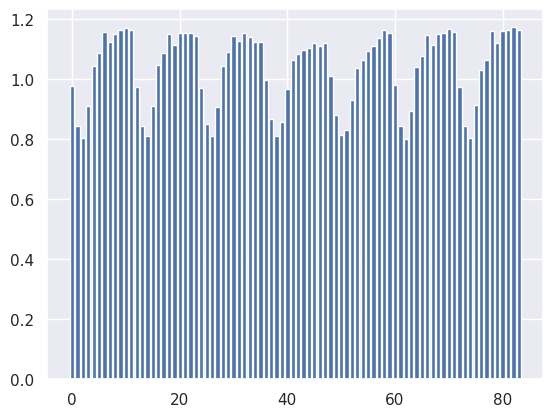

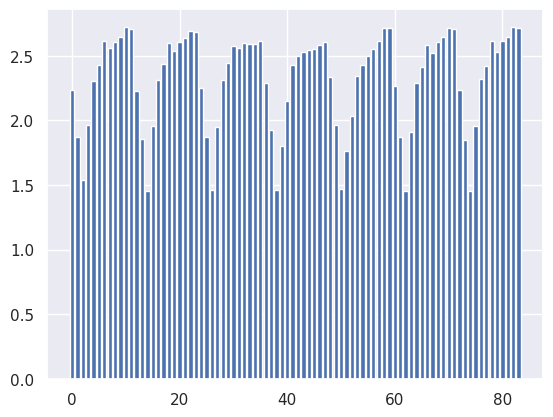

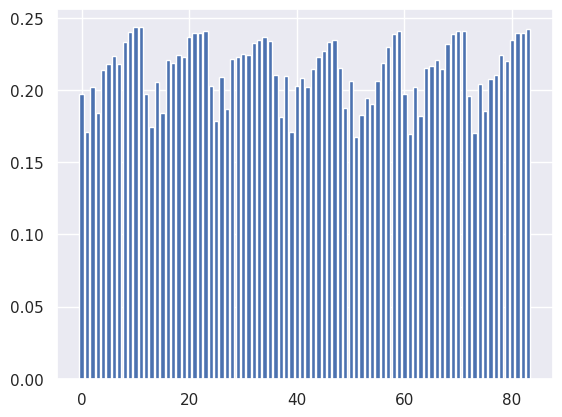

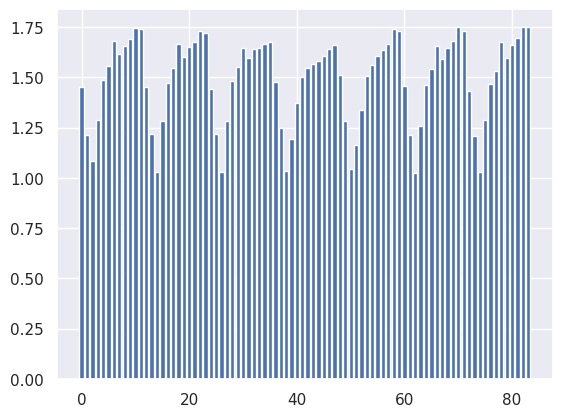

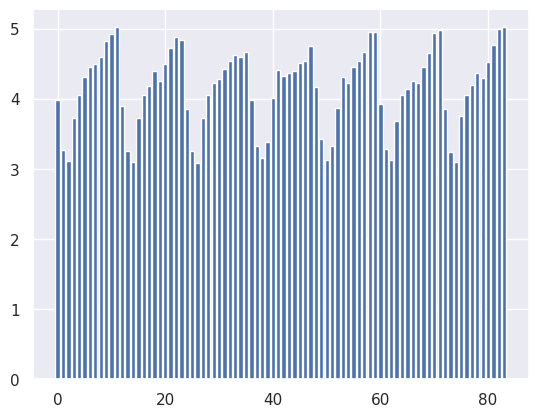

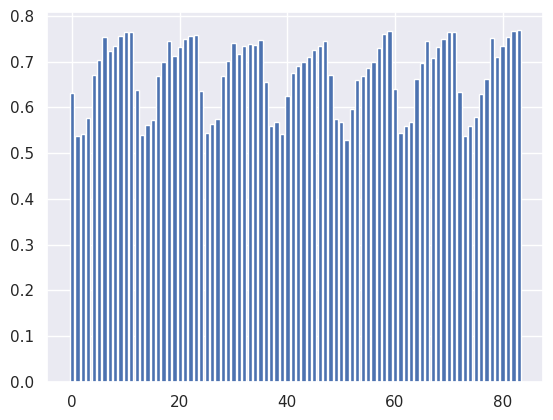

In [68]:
for f in kmeans.cluster_centers_:
    plt.bar(range(len(f)), f)
    plt.show()

# GMM

In [74]:
gm = GaussianMixture(n_components=3, covariance_type="diag").fit(X)

In [75]:
gm.means_.shape

(3, 84)

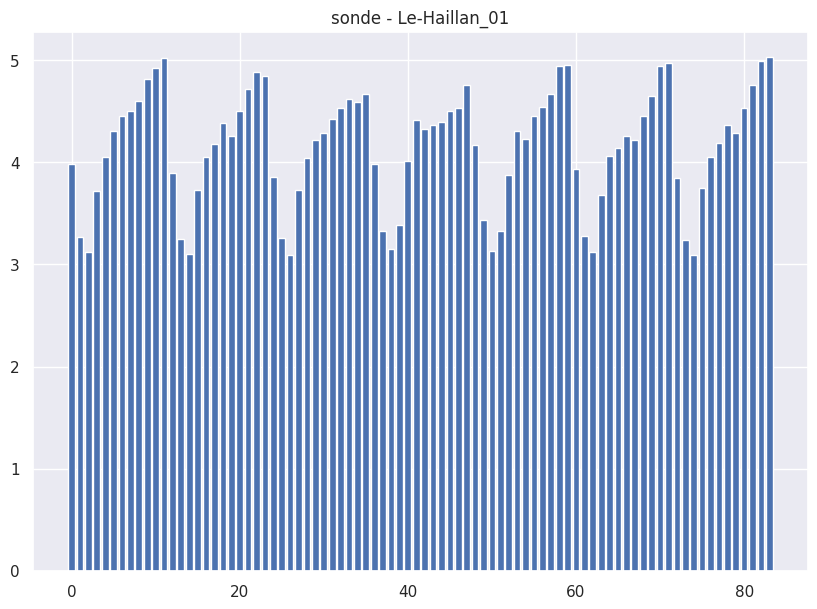

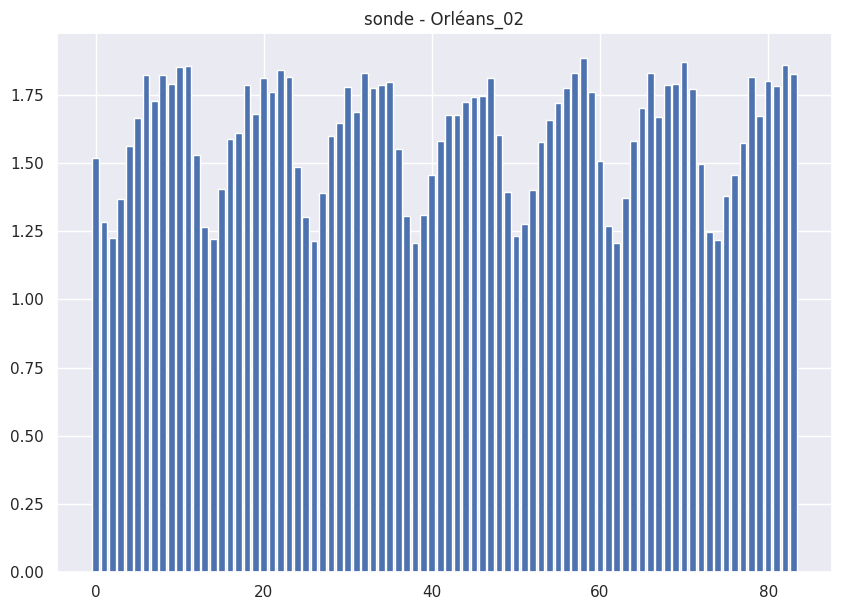

In [76]:


scores_based_on_gm = gm.score_samples(X)
outliers = np.argsort(scores_based_on_gm)[:2]


for i, ind in enumerate(outliers):
    plt.figure(figsize=(10,7))
    #plt.subplot(4, 5, i+1)
    #plt.imshow(x_im[ind])
    plt.title(f"sonde - {dataset.sondes_names[ind]}")
    plt.bar(range(len(X[0])), X[ind])
    plt.show()



In [58]:
scores_based_on_gm

array([104.83532043,  72.23477393,  30.74083202,   2.03526171,
        41.42267364,  97.77194966,  71.80583714,  56.48095587,
        49.80408762,  75.34923236,  -2.82465628,  65.31715246,
        78.46779954,  91.72901022,  11.35600584, -11.66000703,
        83.72358642, -14.08531709,  51.97865232,  92.72519711,
        44.9759398 ,  17.35641282,  67.69434297,  10.77680146,
        39.10446107,  68.71802462, 498.74311702,  91.15838873,
       -30.87293549, -28.66224143,  30.01552244,   8.7428482 ,
        -2.29404269,  91.50230939,  17.10679307,  38.13462064,
        60.23511936,  84.27203226,   5.04135144,  29.46998613,
        27.29551888,  52.22035737,  49.91365357,  10.00549877,
        96.4253224 , 101.42461543,  47.92397404,  85.15042507,
        54.3453051 ,  24.59693385,   7.55193746, 102.51402946,
        72.25355032,  -0.66803242,  -7.63377252,  77.23398836,
        57.86683725,  62.81477613,  38.08246554, 103.71284397,
        99.88023539,  71.619864  ,  95.56778072,  48.66